In [1]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as intpol
from pylab import figure, text, scatter, show
import sys, math, numpy
%matplotlib inline

import seaborn as sns
sns.set_theme()

In [2]:
def load_bcig(sysname, pathname, den_est):
    """load the bcig contributions and return the x labels / chemical processes."""
    _basedir = f'../../4.bcig/{den_est}_bcigs/{sysname}.{pathname}.npath_200.npy'
    if pathname == 'r1ae':
        return numpy.load(_basedir), ['B0', 'B1', 'P0', 'P1', 'P2', 'P3']
    else:
        return numpy.load(_basedir), ['B0', 'B1',             'P2', 'P3', 'P4']

toho_amp r1ae [ 2.84194816  7.5067535   8.22249204  9.94246379 10.09969115 18.41332912]


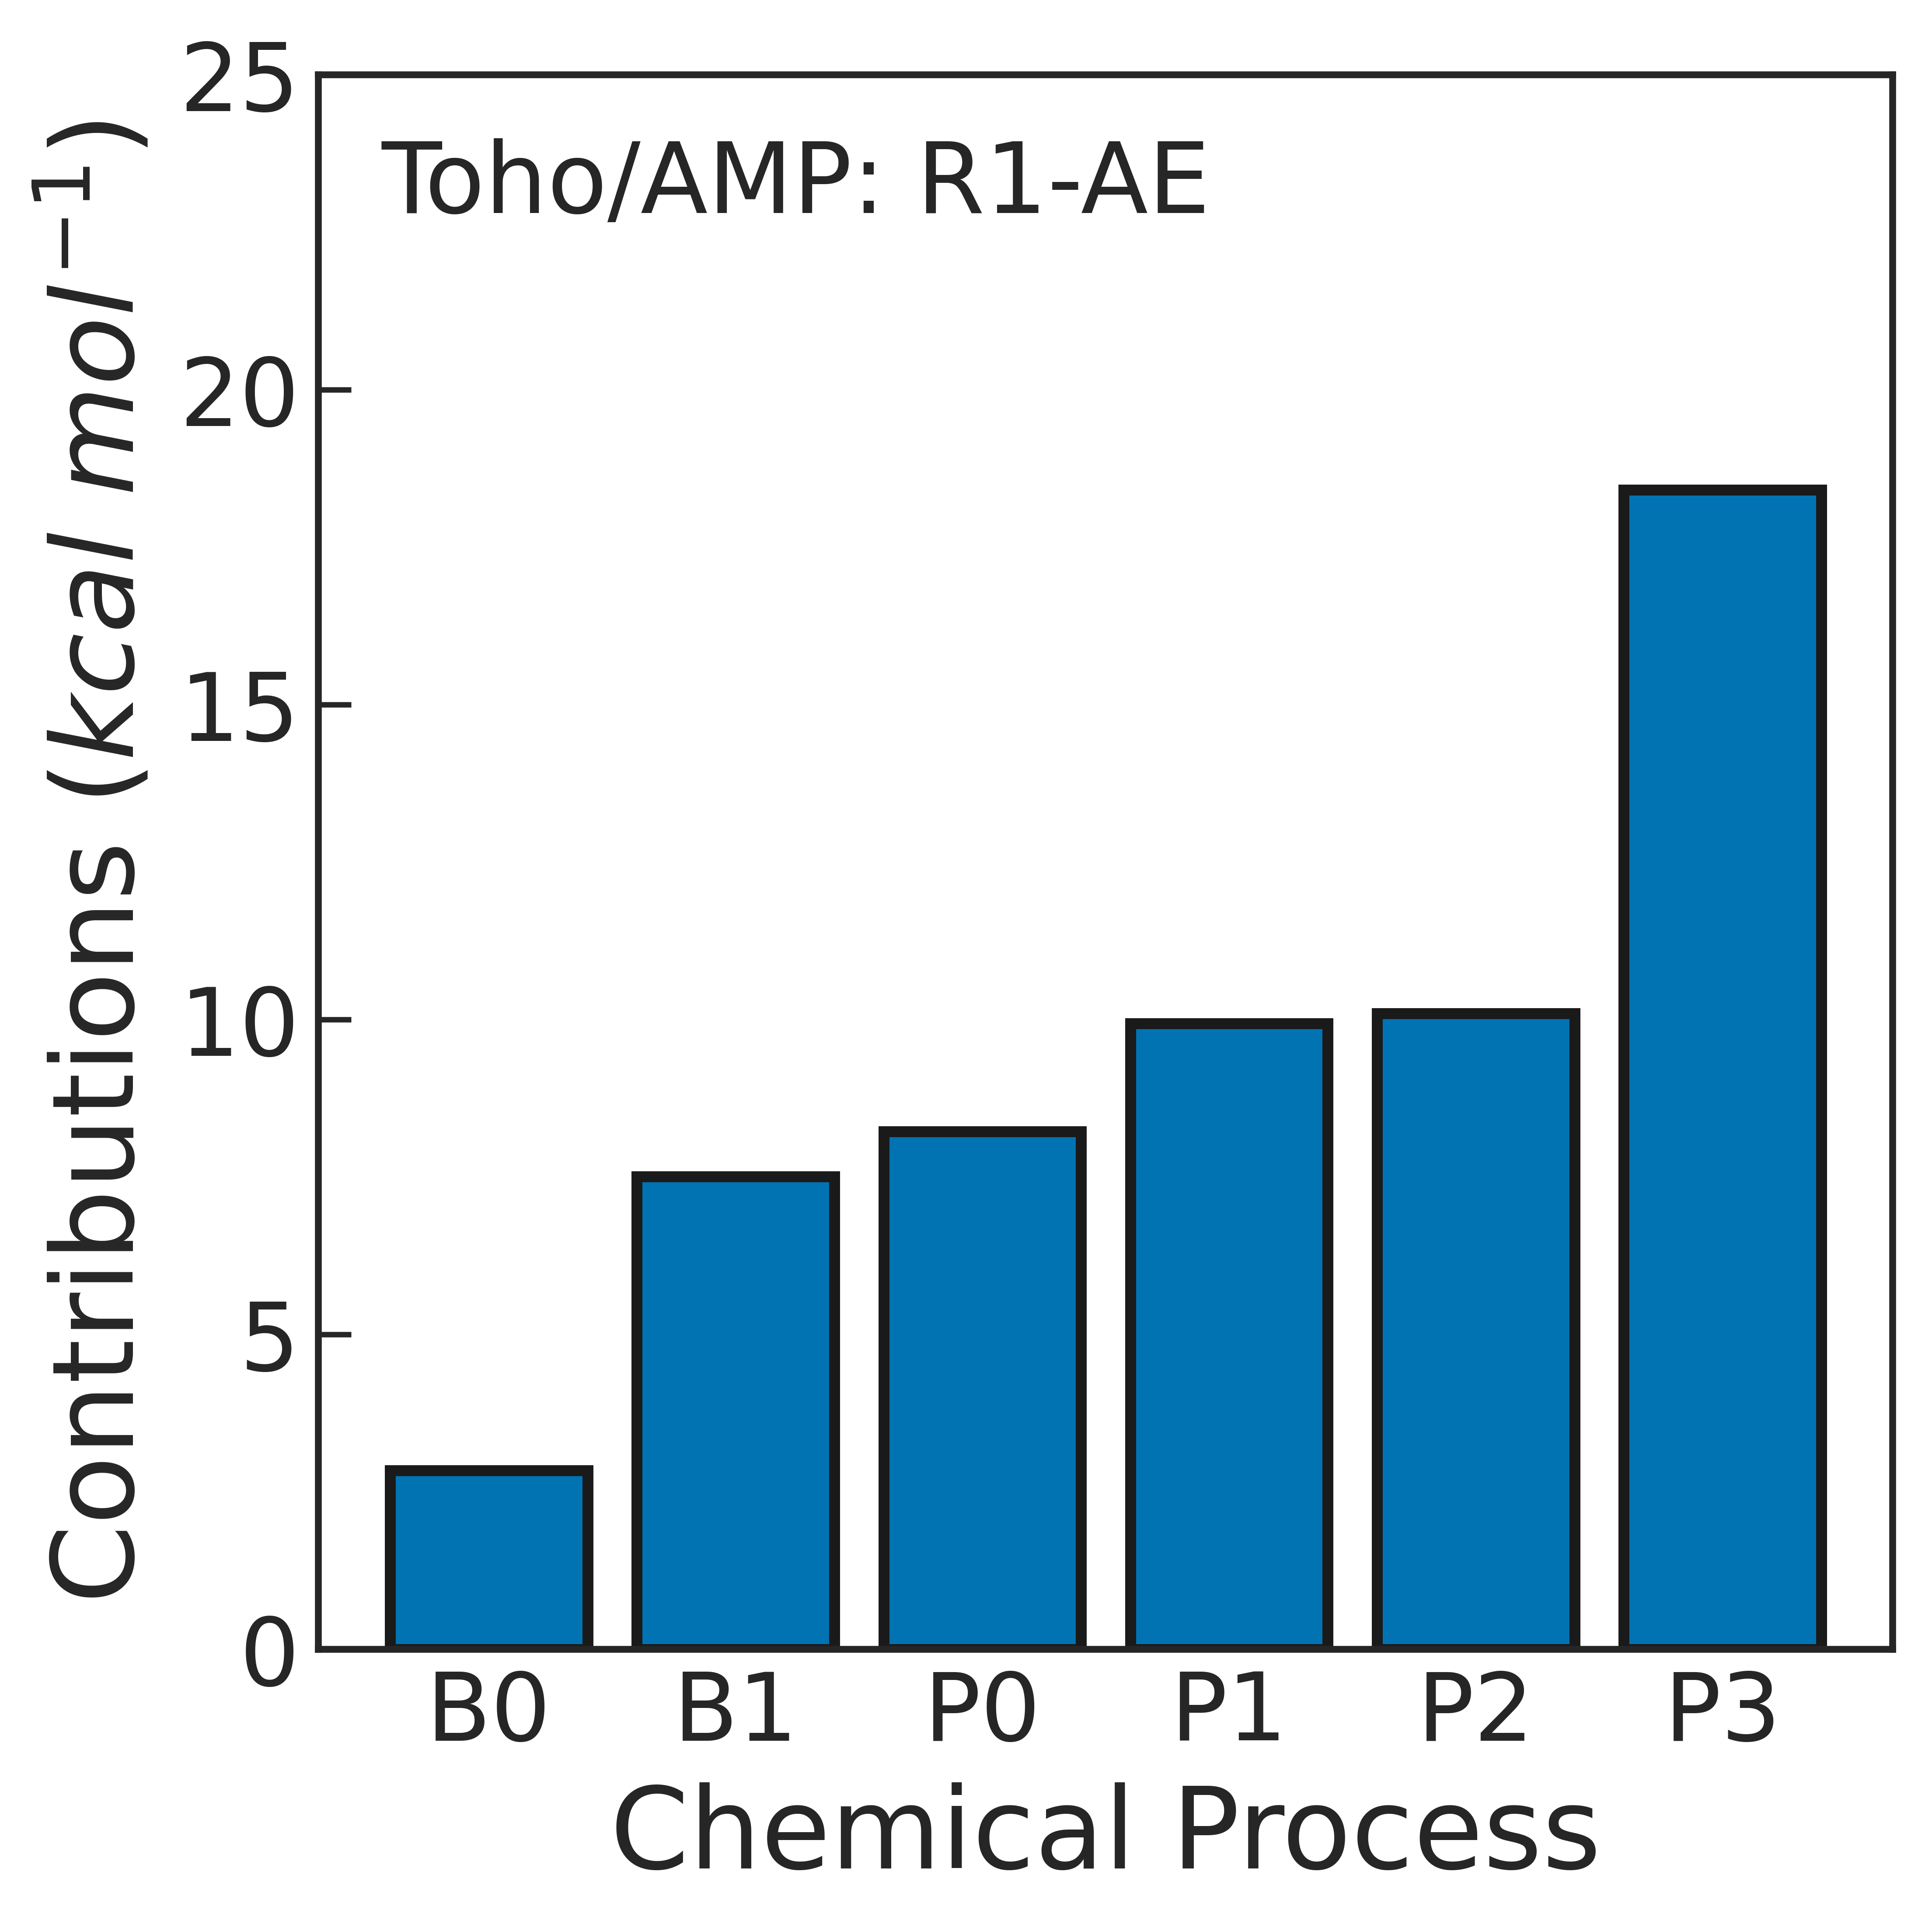

toho_cex r1ae [14.49091733  7.80899748 12.57365644 28.75392139 16.49267077 44.37934458]


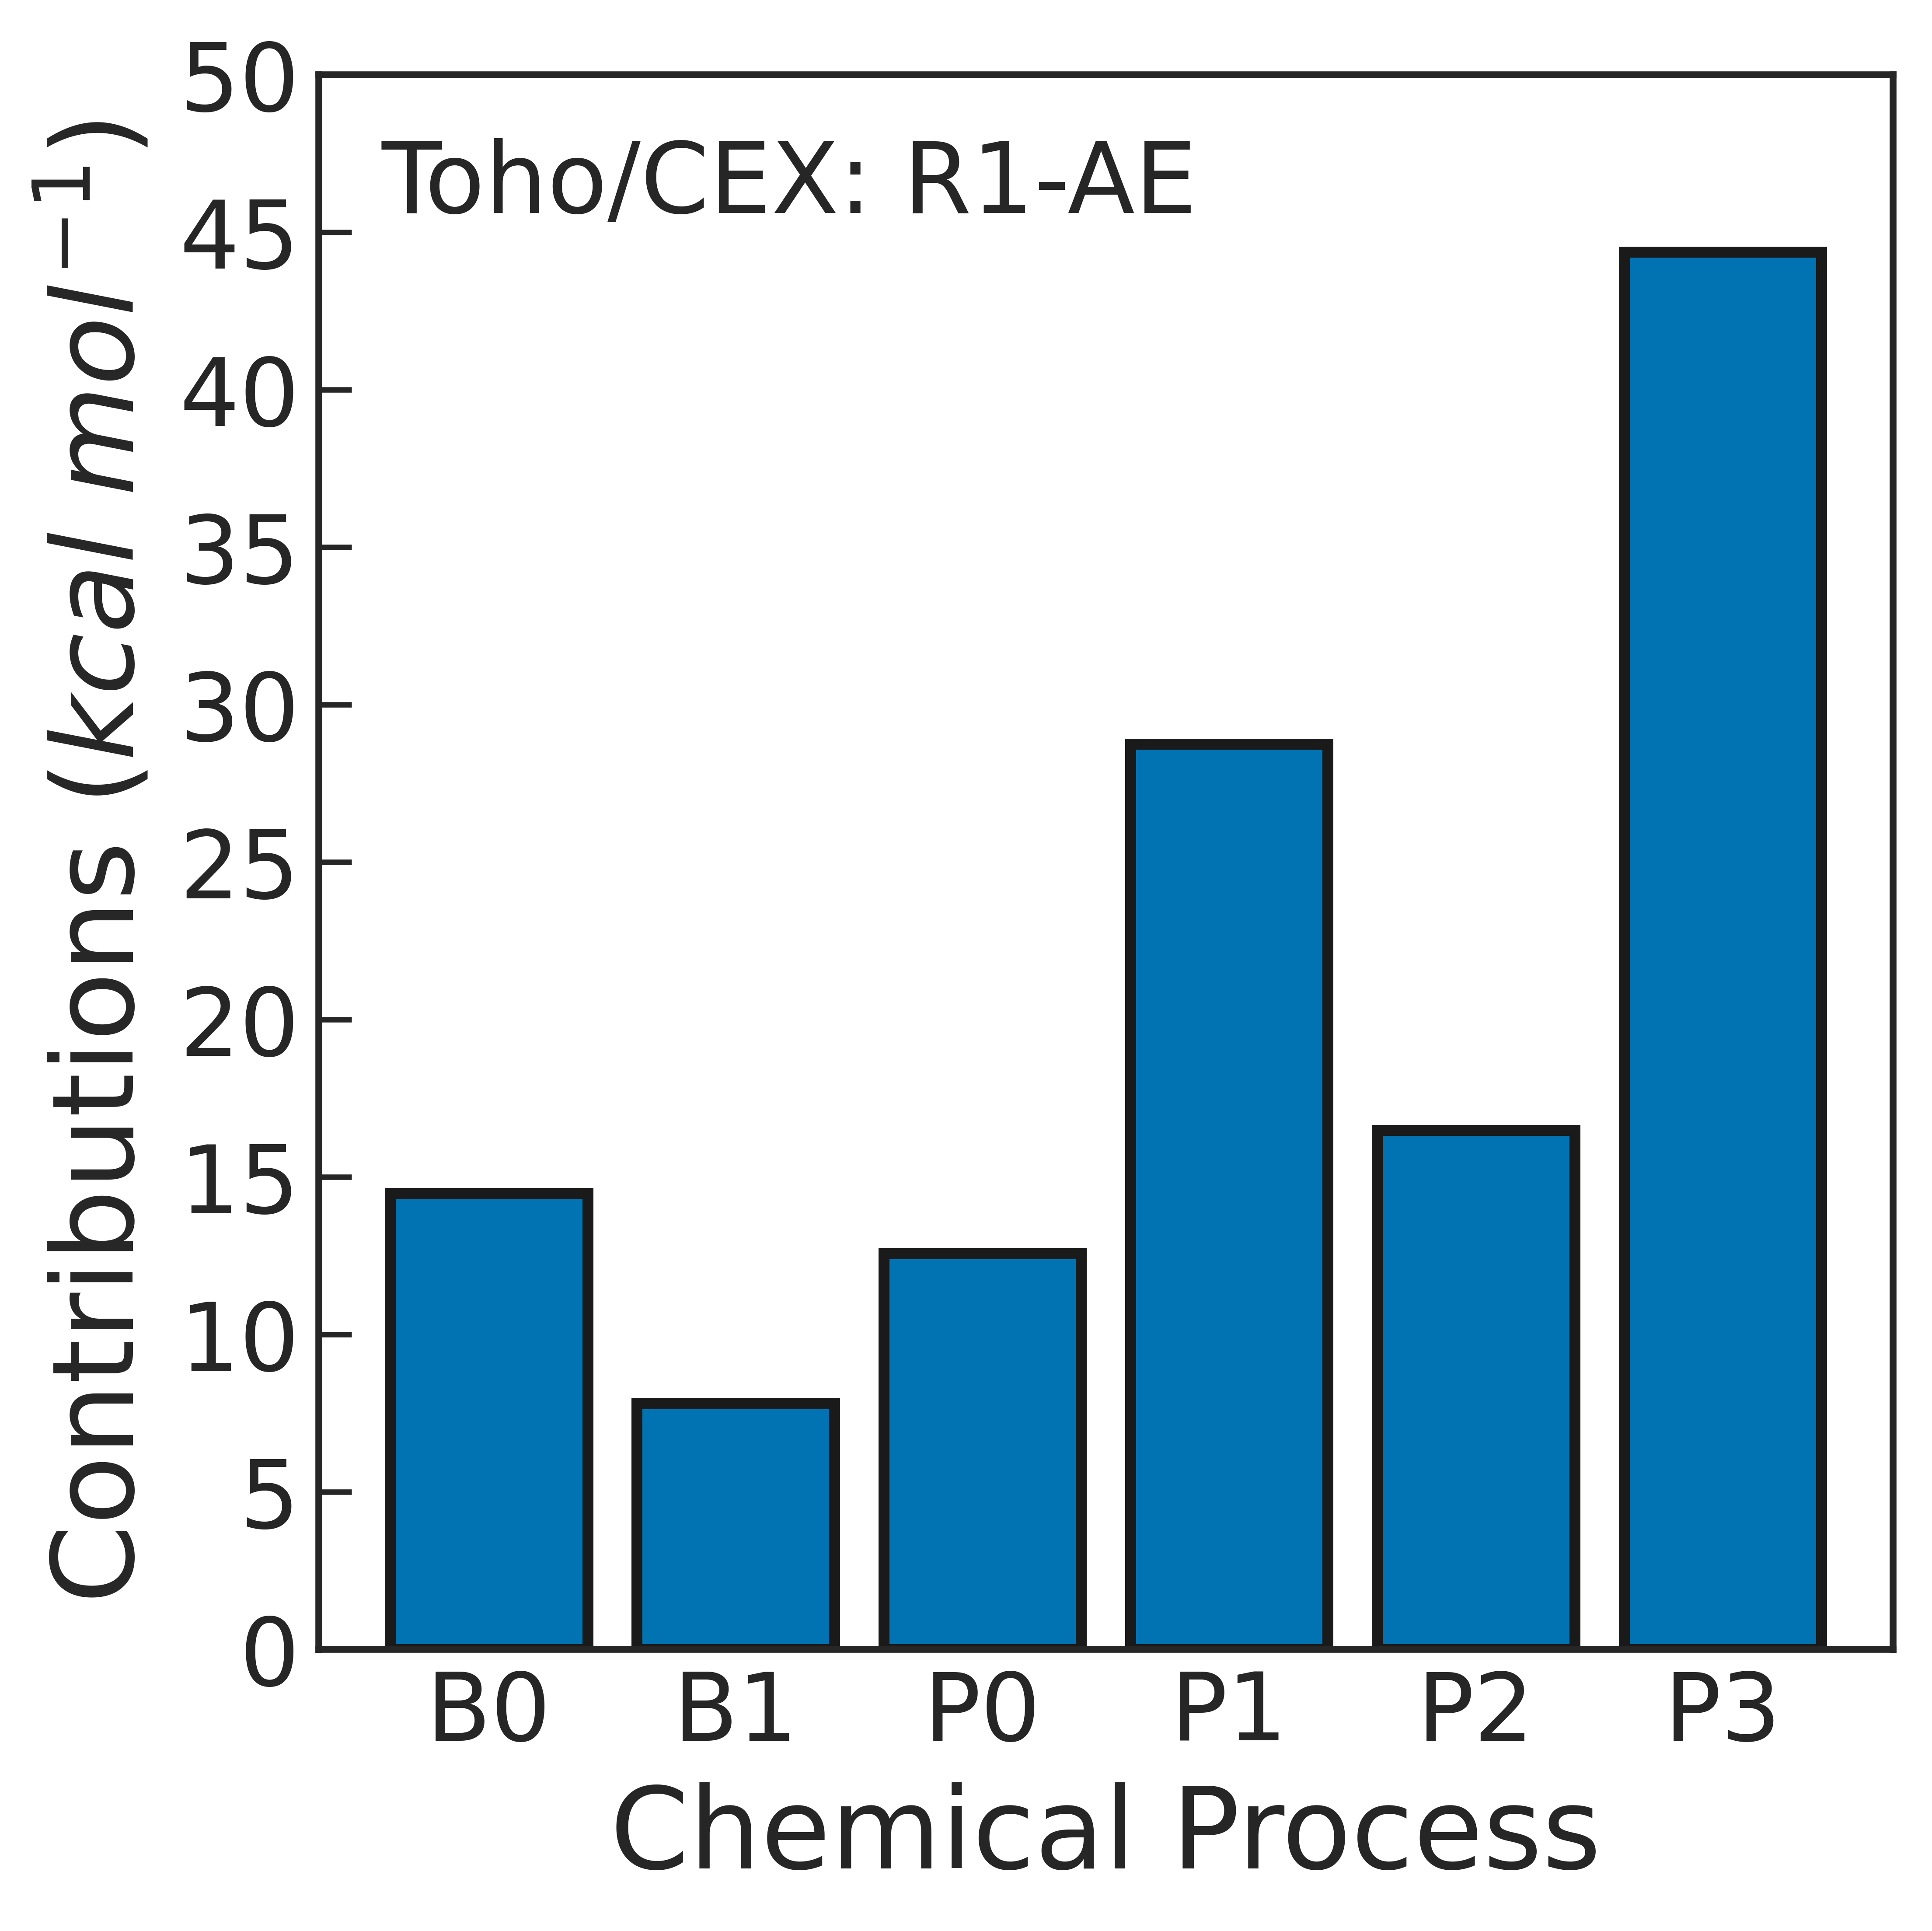

toho_amp r2ae [25.71959496 23.4261483  63.40019107 25.5879283  10.57879105]


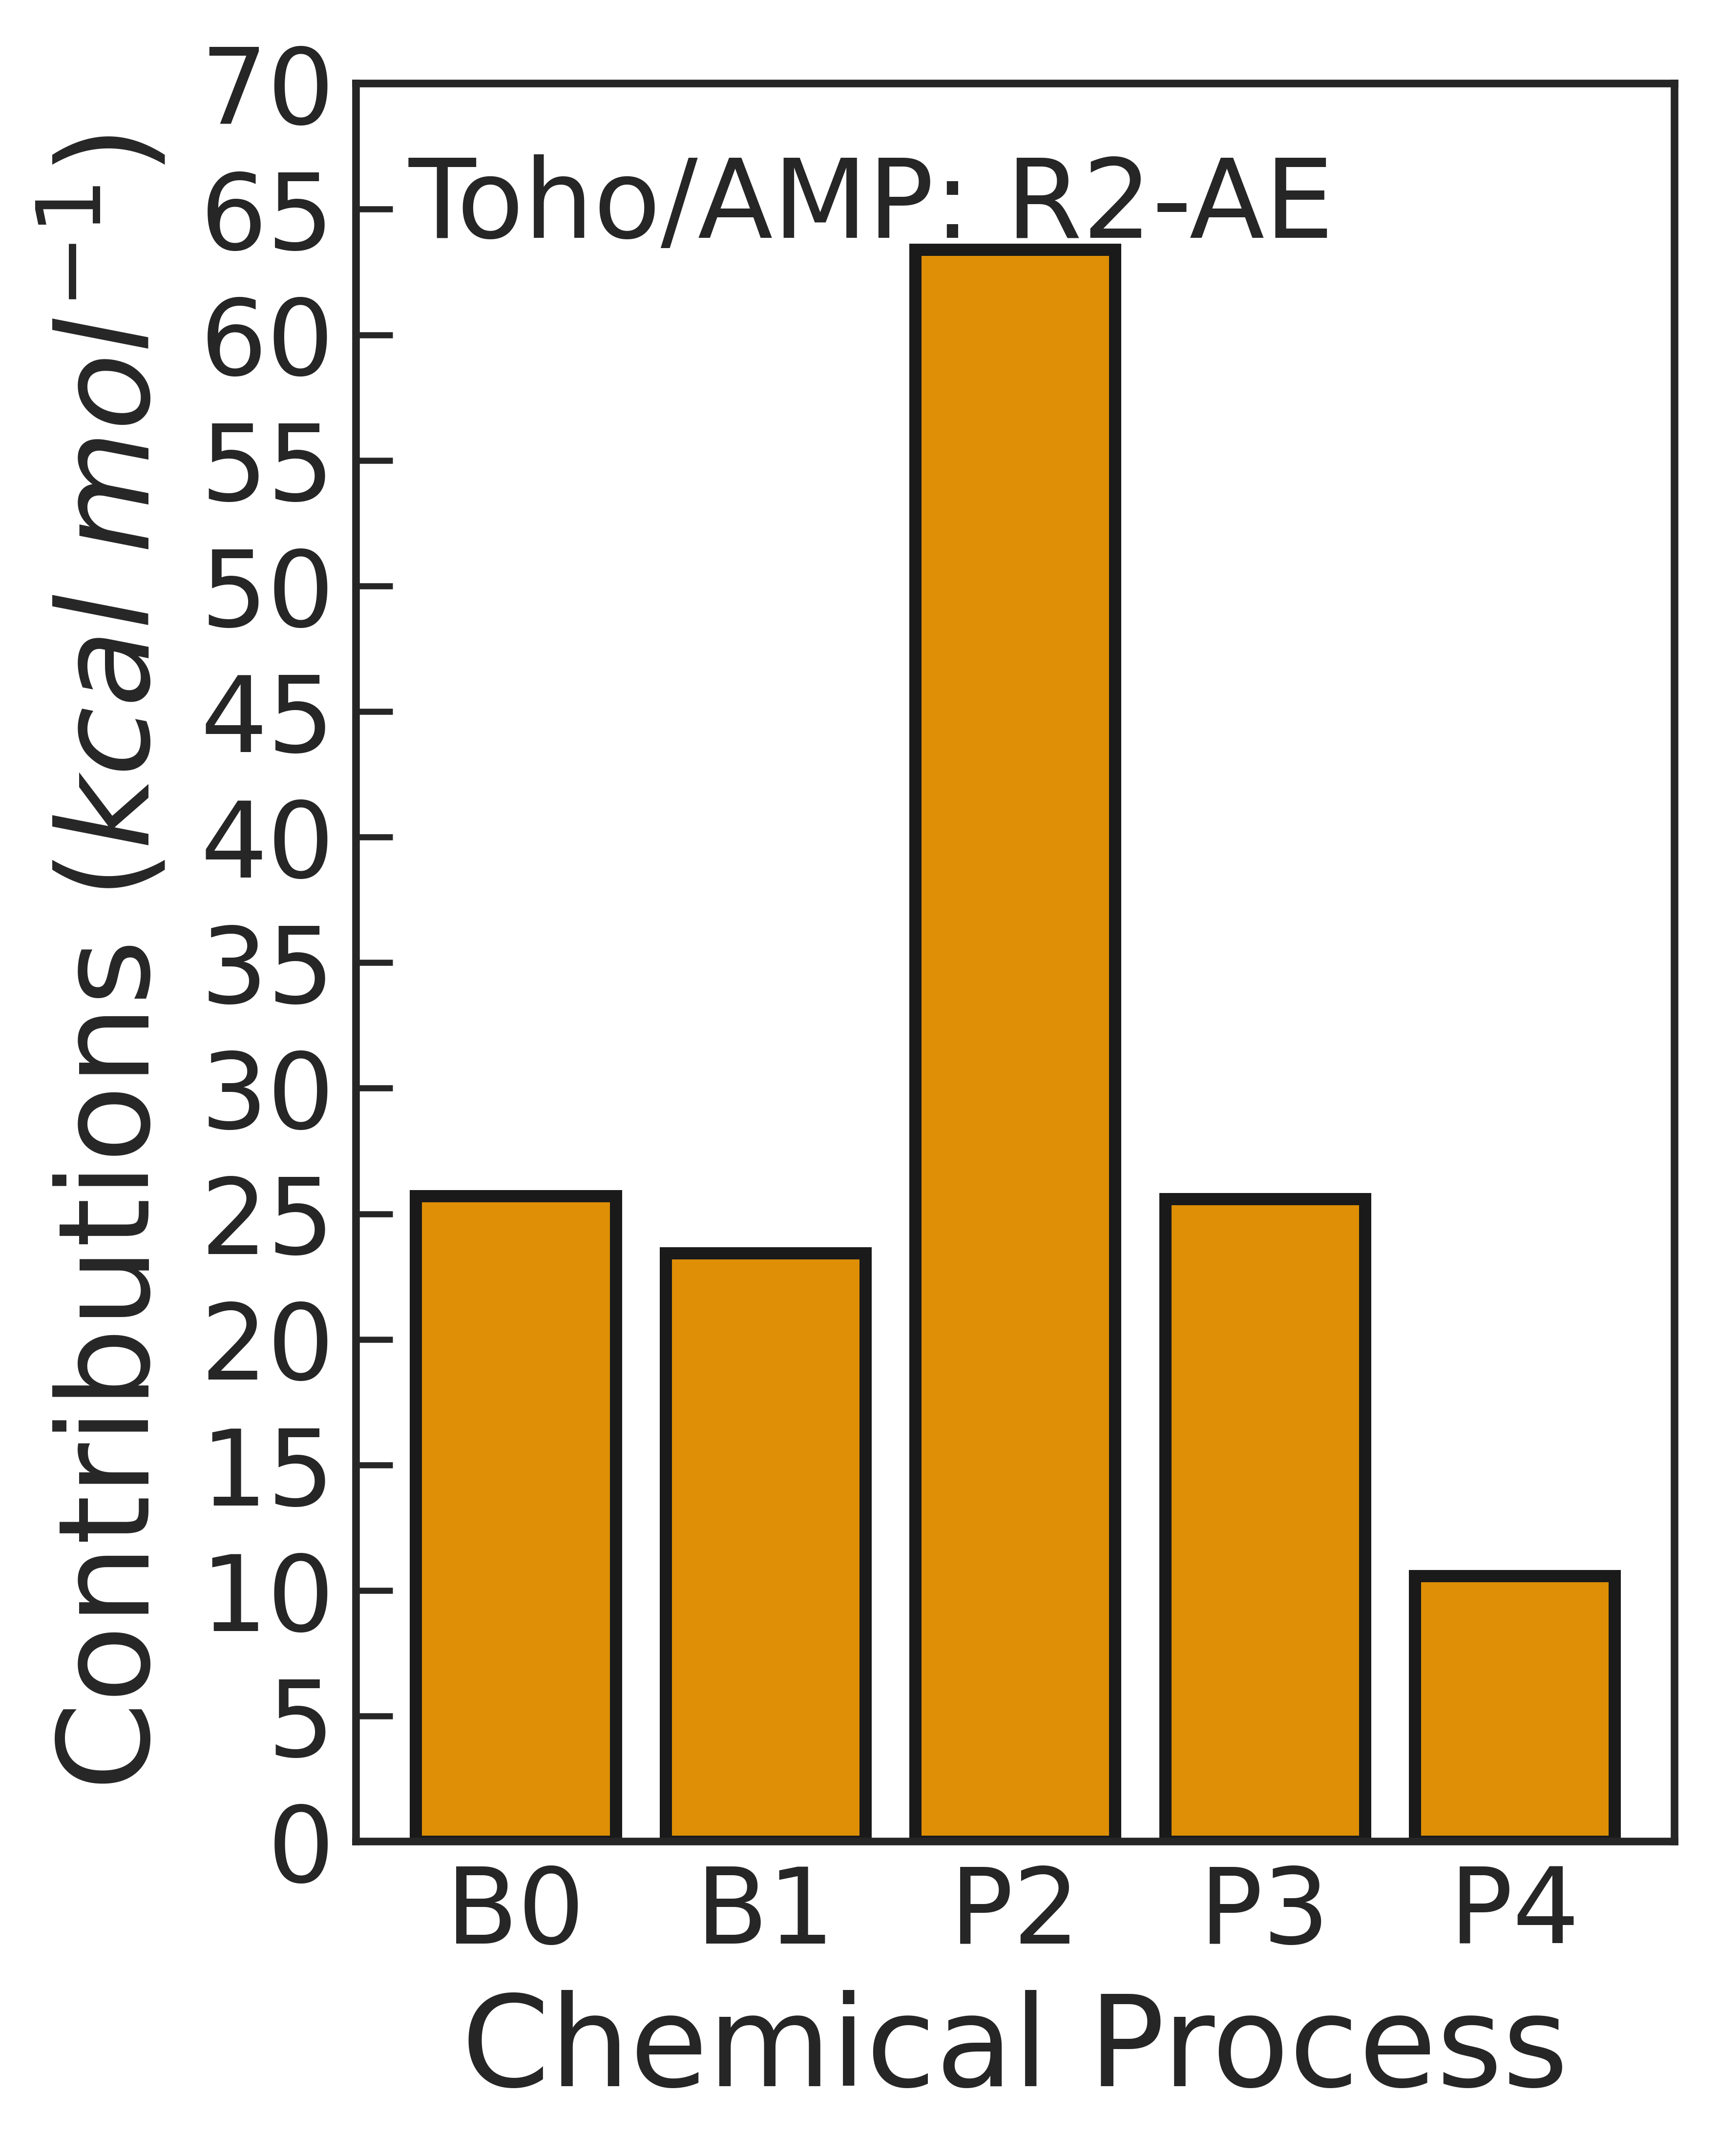

toho_cex r2ae [12.88124919 22.50113487 29.58022356 36.19349003 13.55812848]


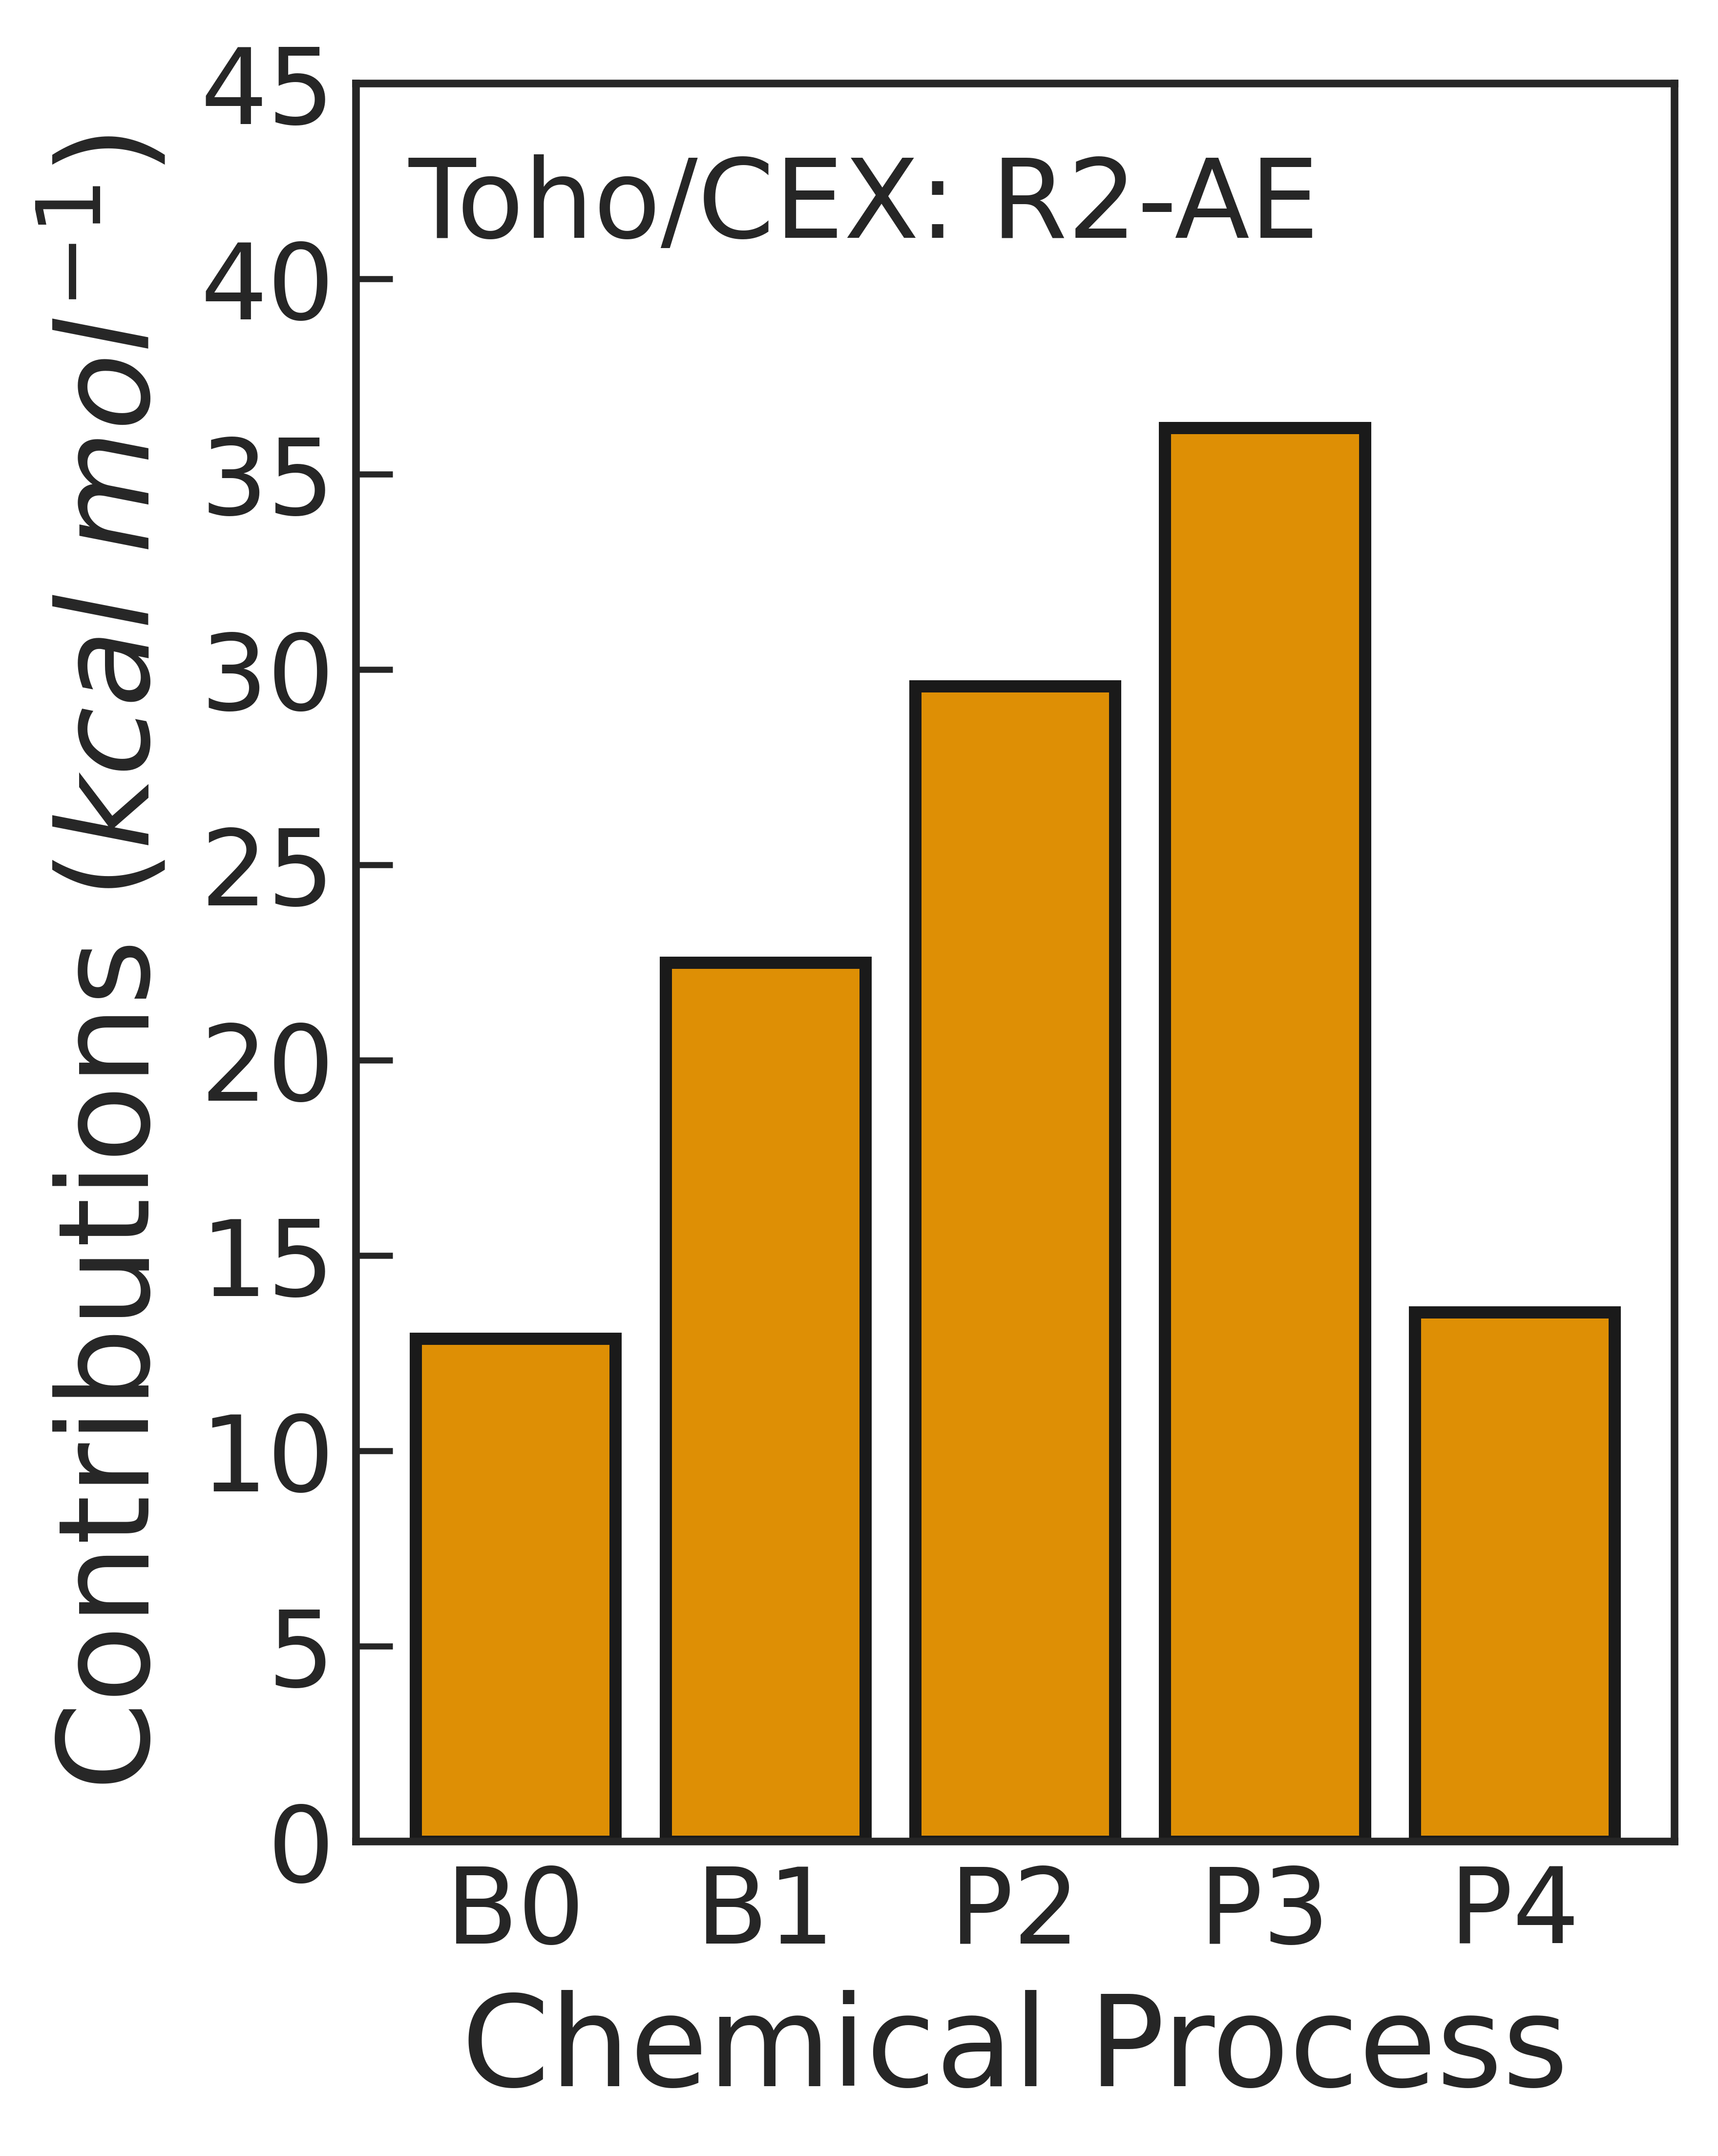

In [5]:
den_est = 'gauss'
logout = open(f'{den_est}_bcig.log', 'w')

for pathname in ['r1ae', 'r2ae']:
    color=sns.color_palette('colorblind')[0] if pathname == 'r1ae' else sns.color_palette('colorblind')[1]
    
    for sysname in ['toho_amp', 'toho_cex']:
        bcig, chem_tags = load_bcig(sysname, pathname, den_est)
        logout.write(f'{sysname} {pathname} {str(bcig)} \n')
        print(f'{sysname} {pathname} {str(bcig)}')
        
        # init figure ==================================================================
        sns.set_style(style='white')
        sns.set_style("ticks")
        fig, ax,  = plt.subplots(figsize=(7, 6), dpi=900, facecolor='w', edgecolor='k')
        ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )
        if pathname == 'r1ae':
            plt.subplots_adjust(left=2/7, right=6/7, top=5/6, bottom=1/6)
        else:
            plt.subplots_adjust(left=2/7, right=5/7, top=5/6, bottom=1/6)
            

        #ax.set_xlim(0, 100)
        ytickmax = int(math.ceil(numpy.max(bcig) / 5.)) * 5
        ax.set_ylim(0, ytickmax)
        nticks = int((ytickmax+4)/5)+1
        
        plt.yticks([5*q for q in range(nticks+1)])
        
        ax.text(0.04, 0.96,
                sysname[0].upper() + sysname[1:4].lower() + sysname[4:].replace('_', '/').upper() + ': ' + pathname[:2].upper() + '-' + pathname[2:].upper(), 
                ha='left', va='top', transform=ax.transAxes, fontsize=18)
        plt.xticks([x for x in range(len(chem_tags))])
        ax.set_xticklabels(chem_tags)

        ax.set_xlabel(r'Chemical Process', fontsize='xx-large', )
        ax.set_ylabel(r'Contributions'+r' $(kcal$ $mol^{-1})$', fontsize='xx-large')
        # ax.set_ylabel(r'Contributions (%)', fontsize='xx-large', )
        ax.tick_params(labelsize='x-large')

        ax.bar(x=range(len(bcig)), height=bcig, width=0.8, color=color, edgecolor='k', linewidth=2)

        fig.savefig(f'{den_est}.{sysname}_{pathname}.contri.png')
        plt.show()

toho_amp r1ae [1.67400991 7.87289202 4.88210647 5.07050887 6.22649733 7.10535648]
toho_cex r1ae [ 5.15632629 12.62965927 11.20174129 22.89964216 13.80952261 25.10689486]


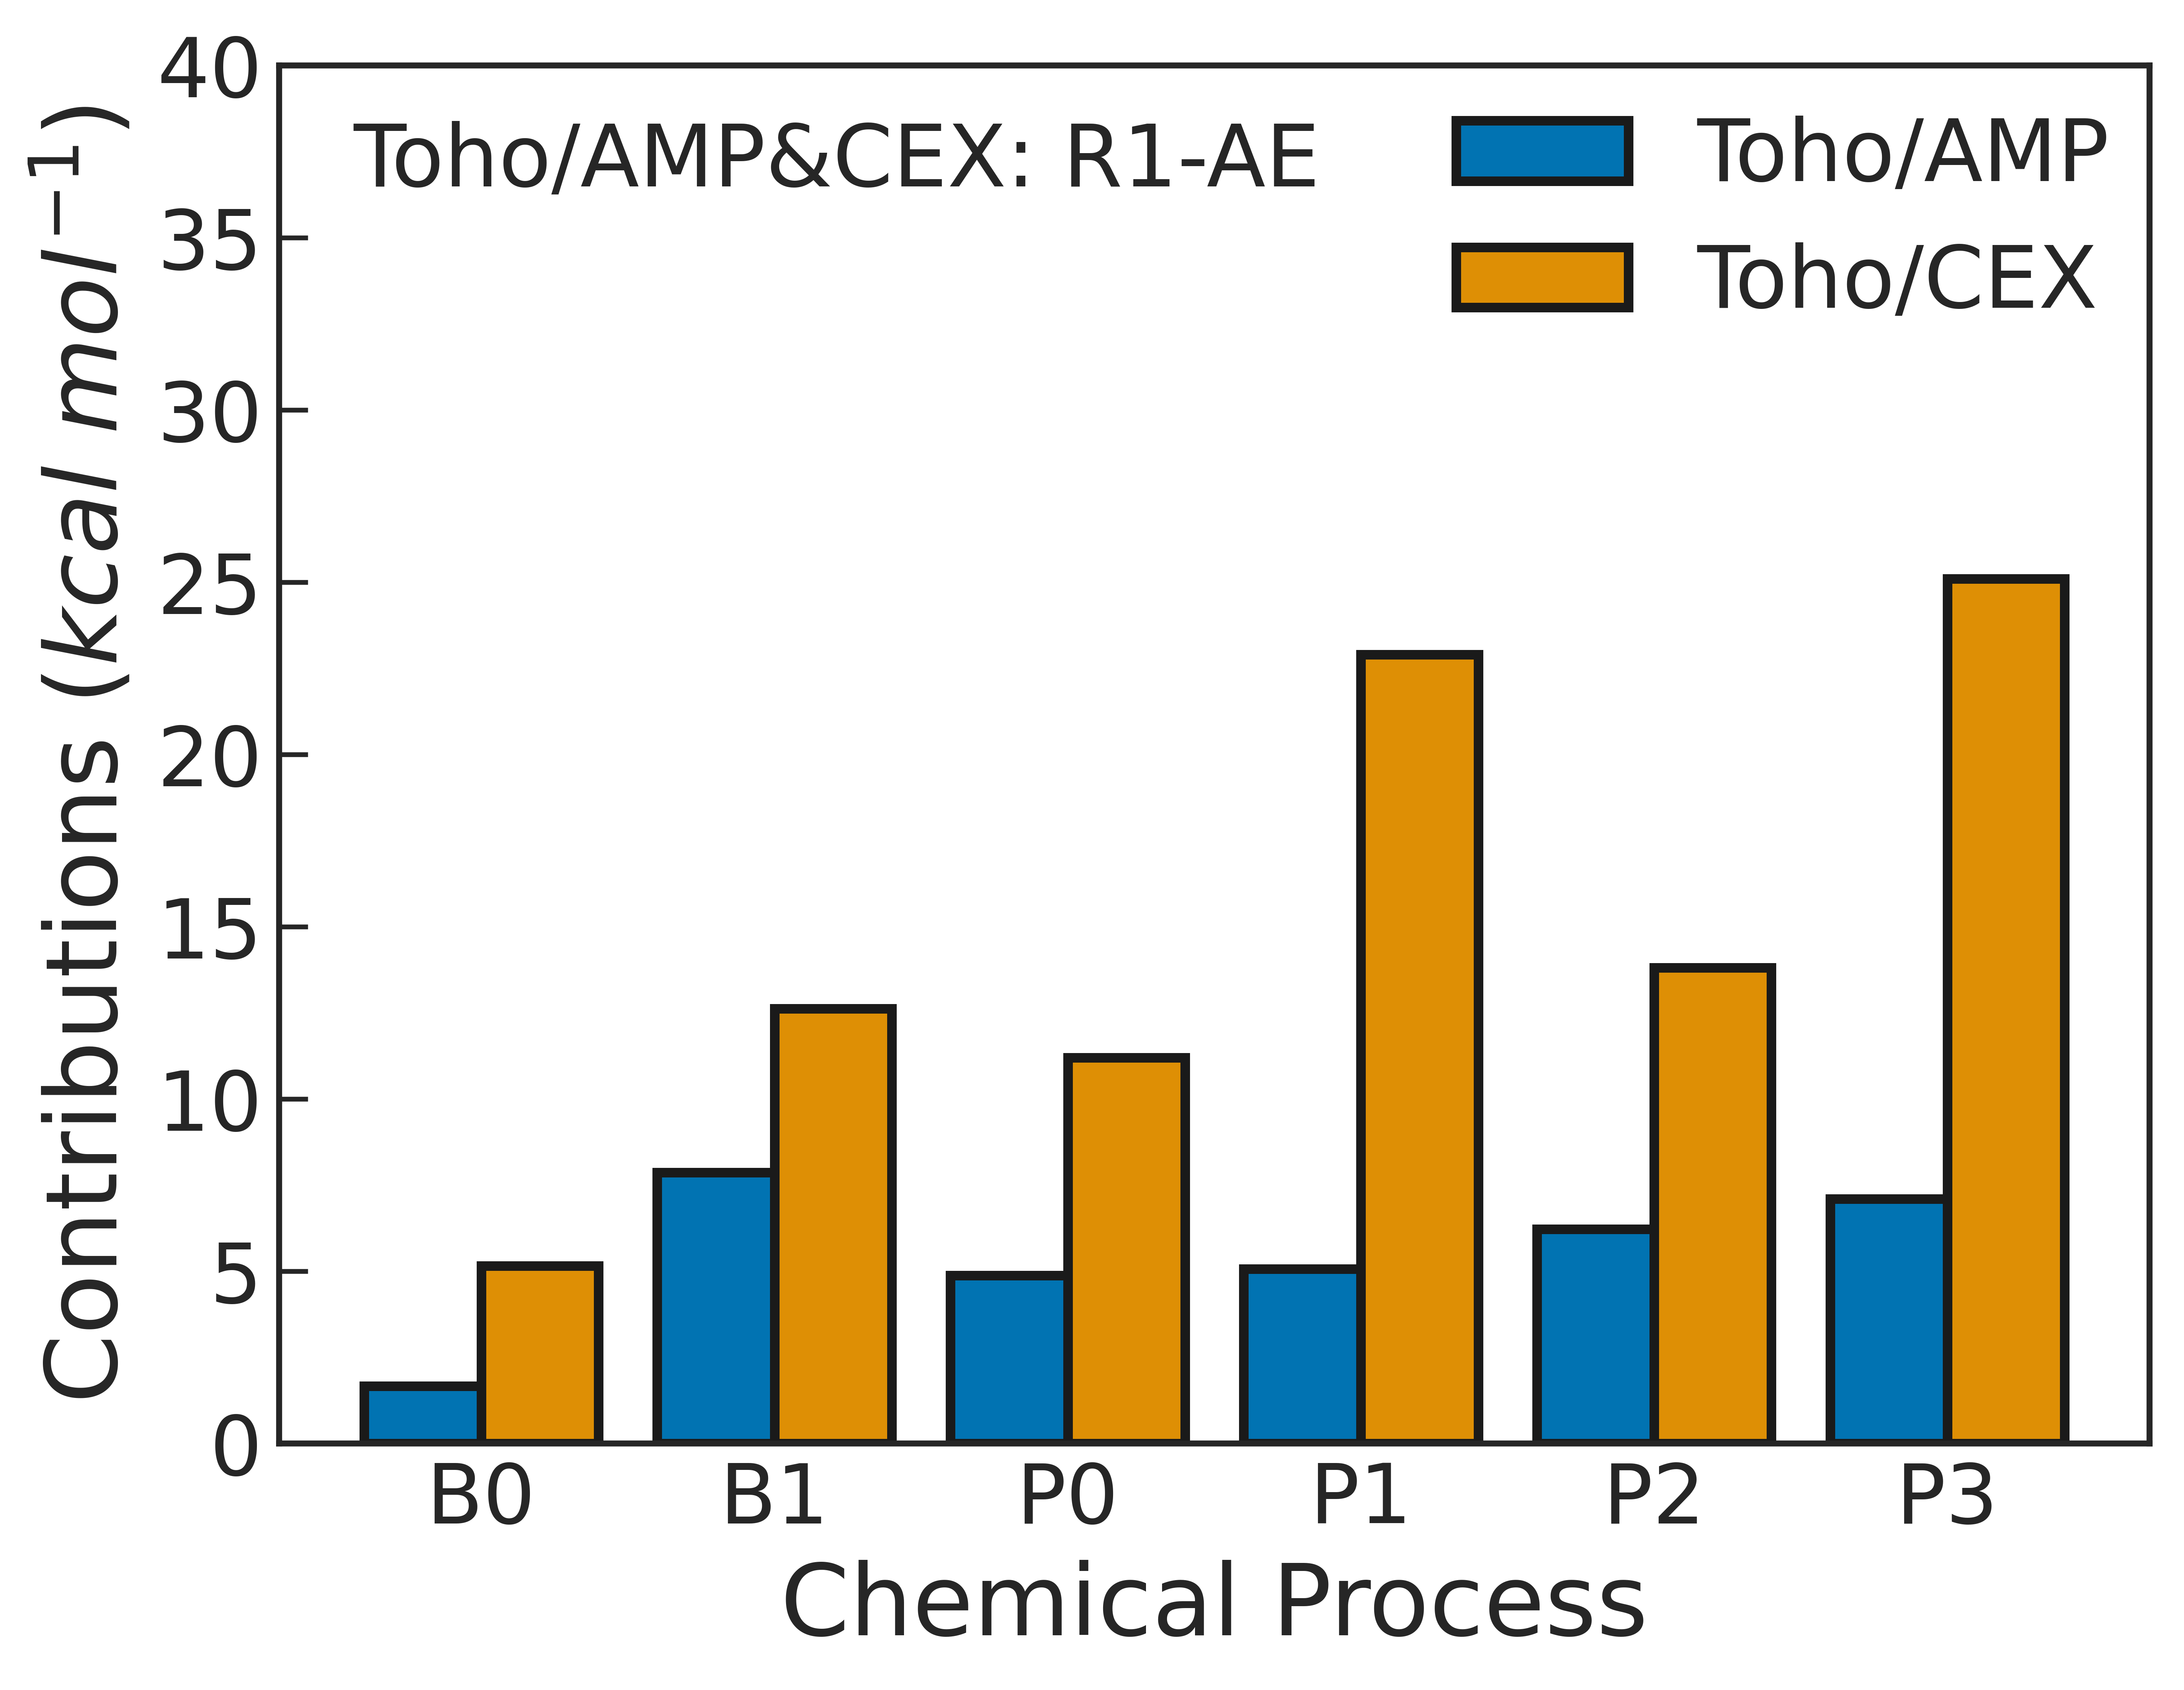

toho_amp r2ae [12.46781959 21.87051039 39.26515623 31.36430899  4.88731206]
toho_cex r2ae [19.78269691 21.0075374  42.26330566 37.54499228 11.16890072]


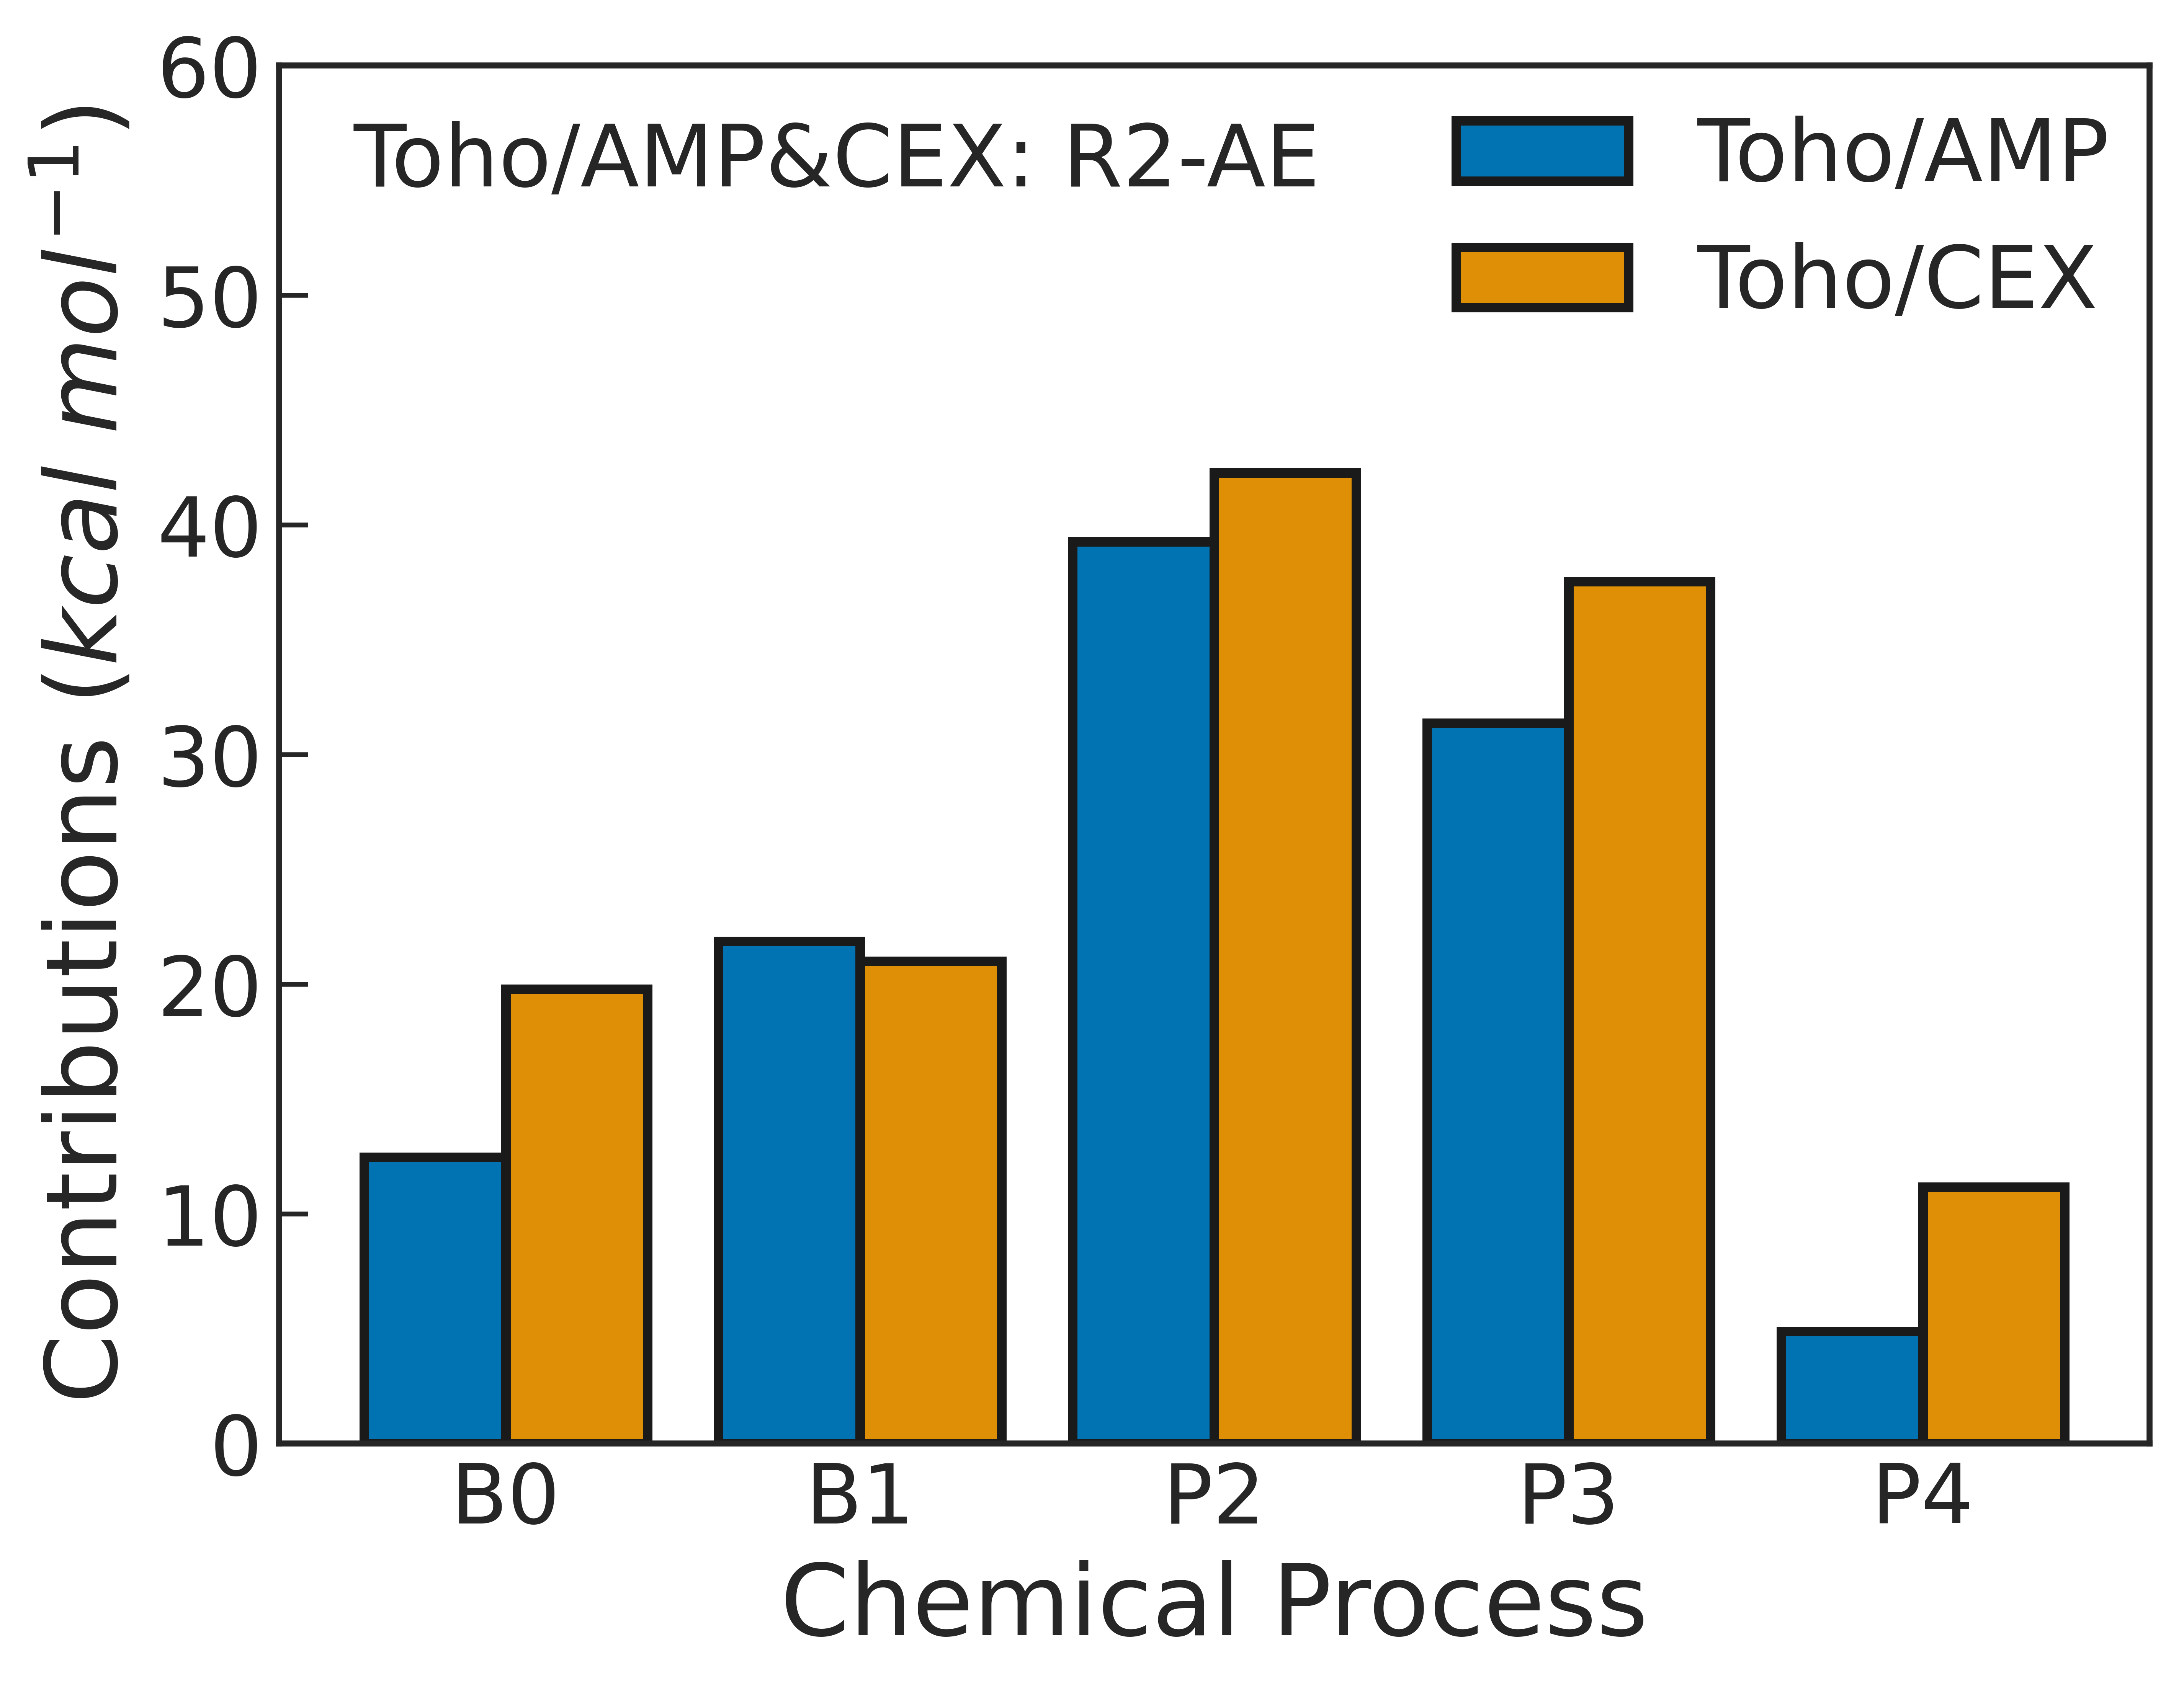

In [17]:
den_est = 'gmm'
logout = open(f'{den_est}_both_bcig.log', 'w')

for pathname in ['r1ae', 'r2ae']:
    
    # load data ====================================================================
    amp_contri, chem_tags = load_bcig('both_amp', pathname, den_est)
    cex_contri, chem_tags = load_bcig('both_cex', pathname, den_est)

    logout.write(f'toho_amp {pathname} {str(amp_contri)} \n')
    logout.write(f'toho_cex {pathname} {str(cex_contri)} \n')
    print(f'toho_amp {pathname} {str(amp_contri)}')
    print(f'toho_cex {pathname} {str(cex_contri)}')
    
    # init figure ==================================================================
    sns.set_style(style='white')
    sns.set_style("ticks")
    fig, ax,  = plt.subplots(figsize=(9, 6), dpi=900, facecolor='w', edgecolor='k')
    ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )
    if pathname == 'r1ae':
        plt.subplots_adjust(left=2/7, right=8/9, top=5/6, bottom=1/6)
    else:
        plt.subplots_adjust(left=2/7, right=8/9, top=5/6, bottom=1/6)

    #ax.set_xlim(0, 100)
    if den_est == 'gauss': 
        ytickmax = 60 if pathname == 'r1ae' else 70
    else:
        ytickmax = 40 if pathname == 'r1ae' else 60
    ax.set_ylim(0, ytickmax)
    nticks = int((ytickmax+4)/5)+1
                                      
    ax.text(0.04, 0.96,'Toho/AMP&CEX: '+pathname[:2].upper()+'-'+pathname[2:].upper(),
            ha='left', va='top', transform=ax.transAxes, fontsize=18)
    plt.xticks([x for x in range(len(chem_tags))])
    ax.set_xticklabels(chem_tags)

    ax.set_xlabel(r'Chemical Process', fontsize='xx-large', )
    ax.set_ylabel(r'Contributions'+r' $(kcal$ $mol^{-1})$', fontsize='xx-large', )
    # ax.set_ylabel(r'Contributions (%)', fontsize='xx-large', )
    ax.tick_params(labelsize='x-large')

    x = numpy.arange(len(amp_contri))
    
    ax.bar(x-0.2, height=amp_contri, width=0.4, color=sns.color_palette('colorblind')[0] , edgecolor='k', linewidth=2, label='Toho/AMP')
    ax.bar(x+0.2, height=cex_contri, width=0.4, color=sns.color_palette('colorblind')[1] , edgecolor='k', linewidth=2, label='Toho/CEX')
    
    leg = plt.legend(loc='upper right', bbox_to_anchor=(1.02, 1.02), prop={'size':18}, frameon=False)
    for legobj in leg.legendHandles:
        legobj.set_alpha(1.)
        
    fig.savefig(f'{den_est}.both_{pathname}.contri.png')
    plt.show()